## Q1

In [ ]:
# (for windows os) download correct libsvm ver from https://www.lfd.uci.edu/~gohlke/pythonlibs/#libsvm
! pip install libsvm‑3.23‑cp37‑cp37m‑win_amd64.whl

In [1]:
import svm
import pandas as pd
import numpy as np
from svmutil import * # window OS ，pip install .whl file for libsvm alr

In [2]:
testf=r".\1\promoters\test.txt"
trainf=r".\1\promoters\training.txt"
testf=pd.read_csv(testf,header=None,sep=" ")
trainf=pd.read_csv(trainf,header=None,sep=" ")
test_label=list(testf[0])
train_label=list(trainf[0])
train=list(list(int(i[i.find(":")+1:]) for i in trainf.iloc[:,1:].values[j]) for j in range(len(trainf)))
test=list(list(int(i[i.find(":")+1:]) for i in testf.iloc[:,1:].values[j]) for j in range(len(testf)))

In [29]:
def svm(c,k):
    svm_model.predict = lambda self, x: svm_predict([0], [x], self)[0][0]
    prob = svm_problem(train_label,train)
    param = svm_parameter()
    param.kernel_type = LINEAR
    #param.C = c
    param.kernel_type=k
    m=svm_train(prob, param)
    #accuracy
    co=0
    for i in range(len(test)):
        if m.predict(test[i])==test_label[i]:
            co+=1
    accu=co/len(test)
    return accu

In [30]:
list(svm(5,i) for i in range(0,4))# scroll to last line of the output

Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 0% (0/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy = 100% (1/1) (classification)
Accuracy

[0.84375, 0.8125, 0.90625, 0.4375]

##### kernel = 2, accuracy =0.90625 is the best
## Q2 Q3  see attached pdf Q2

## Q4 .1

In [98]:
import timeit
code_to_test = """
import numpy as np
temp = np.random.rand(1000).astype(np.float64)
t=0
for i in temp:
    t*=i 
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.00020914300000185904


In [101]:
code_to_test = """
import numpy as np
temp = np.log(np.random.rand(1000)).astype(np.float64)
t=0
for i in temp:
    t+=i 
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.00018061900000247987


#### addition compared to multiplication is computationally cheaper.As above,test2 takes longer time than test2. stackoverflow problem occurs for multiplication, hence higher precision,hence memory and computation cost is required.

## 2.

In [103]:
import pandas as pd
testf=r".\4\diabetes_train.csv"
testf=pd.read_csv(testf,header=None)

In [104]:
testf.head(2) #1 label 20 attributes

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.0,0.54,0.68,0.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.0,0.74,1.59,1.18,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [131]:
x, y = testf.drop(columns=0), testf.loc[:, 0][:,np.newaxis]
x['bias'] = np.ones((len(x), 1))

In [137]:
y.shape

(3000, 1)

In [146]:
def backward(theta, x, y):
    # x (dim,)
    # y scalar
    gradient = - (y * x) / (1 + np.exp(y * (x.dot(theta) ) ) ) 
    gradient = gradient[:,np.newaxis]
    return gradient

def loss_func(x, y, theta, iteration):
    # x (n, dim)
    # y (n, 1)
    loss = np.sum(np.log( 1 + np.exp( np.multiply(-y, (x.values.dot(theta))))) )
    acc = np.sum(np.sign(x.values.dot(theta)) == y)/ len(y)
    print("iter "+str(iteration)+" : \n"+"loss: "+str(loss)+" accuracy: "+str(acc))
    return loss, acc


In [147]:
losses = []
accs = []
lr = 0.1
theta = np.random.normal(0, 1, (x.shape[1], 1) )
iterations = 10000
idxs = np.random.choice(len(x), size=iterations)
weights = {}

for iteration, i in enumerate(tqdm_notebook(idxs, file=sys.stdout)):
    xi, yi = x.loc[i,:], y[i]
    gradient = backward(theta, xi, yi)
    theta -= lr * gradient
    if iteration % 100 == 0:
        loss, acc = loss_func(x, y, theta, iteration)
        weights[iteration] = theta
        losses.append(loss)
        accs.append(acc)

iter 0 : 
loss: 3299.2832379479732 accuracy: 0.457
iter 100 : 
loss: 1273.486695241213 accuracy: 0.8356666666666667
iter 200 : 
loss: 1041.4830276271975 accuracy: 0.855
iter 300 : 
loss: 902.1899446001817 accuracy: 0.8783333333333333
iter 400 : 
loss: 743.2904734778542 accuracy: 0.9146666666666666
iter 500 : 
loss: 664.2915939407862 accuracy: 0.925
iter 600 : 
loss: 601.8703798821441 accuracy: 0.9323333333333333
iter 700 : 
loss: 570.5085992127886 accuracy: 0.9363333333333334
iter 800 : 
loss: 549.4304462848595 accuracy: 0.917
iter 900 : 
loss: 500.4724256214282 accuracy: 0.959
iter 1000 : 
loss: 498.5347169224238 accuracy: 0.9253333333333333
iter 1100 : 
loss: 475.1913998024969 accuracy: 0.931
iter 1200 : 
loss: 441.2728388931909 accuracy: 0.9553333333333334
iter 1300 : 
loss: 427.97924727009814 accuracy: 0.9556666666666667
iter 1400 : 
loss: 418.480504132789 accuracy: 0.9656666666666667
iter 1500 : 
loss: 401.6391847805535 accuracy: 0.9536666666666667
iter 1600 : 
loss: 397.381418750

Text(0.5, 0, 'every 100 iterations')

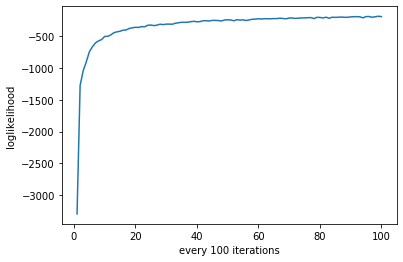

In [148]:

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(range(1, 101), -1*np.array(losses))
plt.ylabel('loglikelihood ')
plt.xlabel('every 100 iterations')

Text(0.5, 0, 'every 100 iterations')

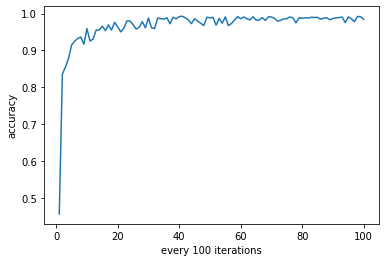

In [149]:
plt.plot(range(1, 101), accs)
plt.ylabel('accuracy')
plt.xlabel('every 100 iterations')

In [150]:
import pickle
with open('weights.pk', 'wb') as f: pickle.dump(weights, f)